# Loading the necessary libraries

In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

# Loading the dataset and setting the categories

In [2]:
Directory=r'C:\\Users\\nitis\\Desktop\\cat vs dog\\PetImages'
Category=['cat','dog']

In [3]:
img_size=100
data=[]
for category in Category:
    folder=os.path.join(Directory,category)
    label=Category.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        try:
            img_arr=cv2.resize(img_arr,(img_size,img_size))
            data.append([img_arr,label])
        except Exception as e:
            pass

In [4]:
random.shuffle(data)
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

# Normalization of the data
Since the images are between the intensity levels 0 to 255, so they are divided by 255 to bring intensities within the range of [0,1]

In [5]:
X=np.array(X)
X=X/255
y=np.array(y)

# Saving and loading values
This will help in running the code just by using these files rather than loading the whole dataset.

In [ ]:
#pickle.dump(X,open('X1.pkl','wb'))
#pickle.dump(y,open('y1.pkl','wb'))
#X=pickle.dump(load('X1.pkl','rb'))
#y=pickle.dump(load('y1.pkl','rb'))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((7985, 100, 100, 3), (1997, 100, 100, 3))

# Designing the neural network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model=Sequential()

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=X.shape[1:],activation='relu'))
model.add(Dense(128,input_shape=X.shape[1:],activation='relu'))
#model.add(Dense(64,input_shape=X.shape[1:],activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

In [9]:
hist=model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorflow.keras.preprocessing import image


In [11]:
model.fit(X_train,y_train,epochs=8,validation_split=0.25,batch_size=32)

Epoch 1/8
188/188 [==============================] - 167s 845ms/step - loss: 0.6842 - accuracy: 0.5654 - val_loss: 0.6724 - val_accuracy: 0.5734
Epoch 2/8
188/188 [==============================] - 158s 837ms/step - loss: 0.6307 - accuracy: 0.6568 - val_loss: 0.6068 - val_accuracy: 0.6805
Epoch 3/8
188/188 [==============================] - 134s 715ms/step - loss: 0.5554 - accuracy: 0.7154 - val_loss: 0.5261 - val_accuracy: 0.7271
Epoch 4/8
188/188 [==============================] - 133s 706ms/step - loss: 0.4839 - accuracy: 0.7592 - val_loss: 0.5035 - val_accuracy: 0.7651
Epoch 5/8
188/188 [==============================] - 128s 682ms/step - loss: 0.4308 - accuracy: 0.7991 - val_loss: 0.5252 - val_accuracy: 0.7526
Epoch 6/8
188/188 [==============================] - 131s 695ms/step - loss: 0.3868 - accuracy: 0.8212 - val_loss: 0.4754 - val_accuracy: 0.7842
Epoch 7/8
188/188 [==============================] - 130s 692ms/step - loss: 0.3291 - accuracy: 0.8473 - val_loss: 0.5355 - val_ac

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

# Testing on random images
accuracy obtained is betwwen 75 to 85%

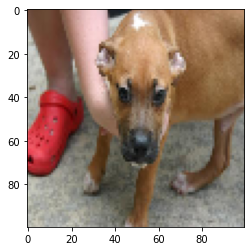

[[0. 1.]]


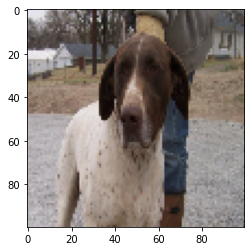

[[2.2231e-11 1.0000e+00]]


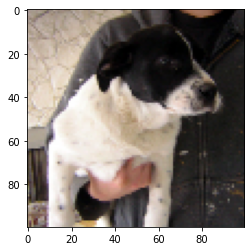

[[0. 1.]]


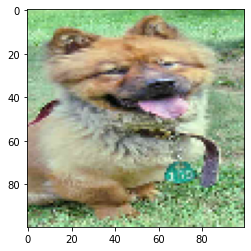

[[0. 1.]]


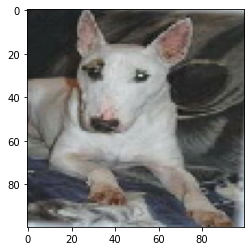

[[0. 1.]]


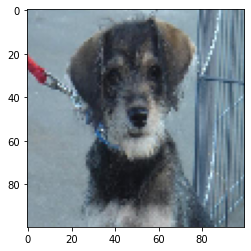

[[0.15873899 0.841261  ]]


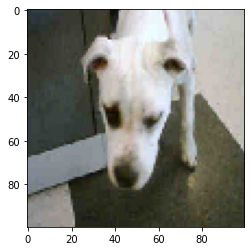

[[0. 1.]]


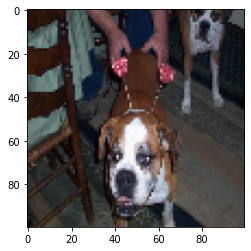

[[0. 1.]]


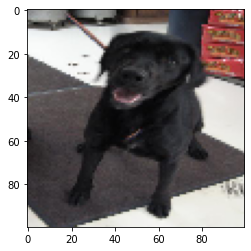

[[1. 0.]]


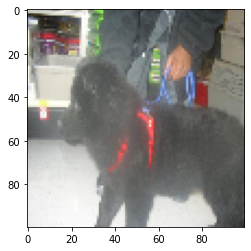

[[4.696914e-22 1.000000e+00]]


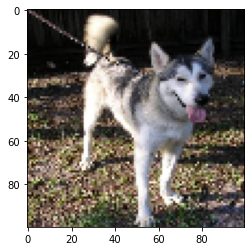

[[0. 1.]]


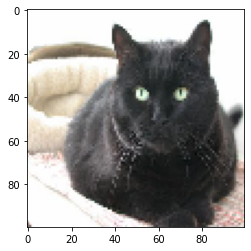

[[1. 0.]]


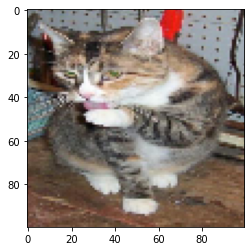

[[1. 0.]]


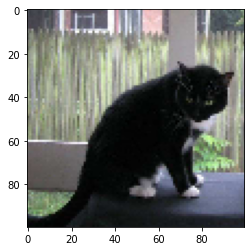

[[0. 1.]]


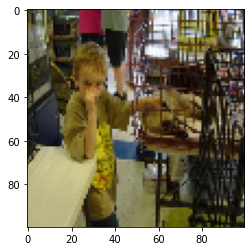

[[0. 1.]]


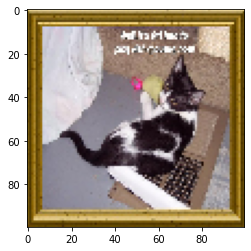

[[0. 1.]]


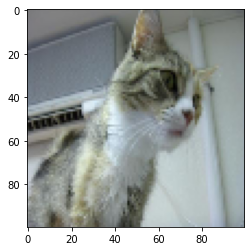

[[1. 0.]]


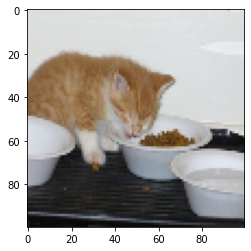

[[0. 1.]]


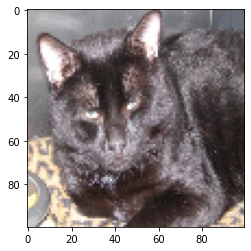

[[0.9782155 0.0217845]]


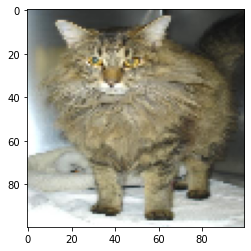

[[1. 0.]]


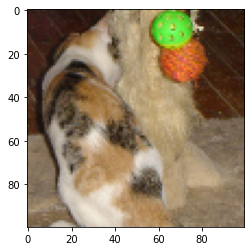

[[0. 1.]]


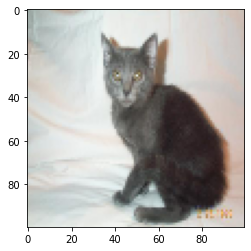

[[1. 0.]]


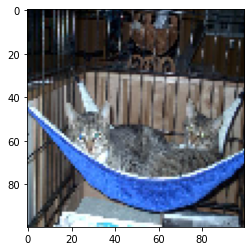

[[1. 0.]]


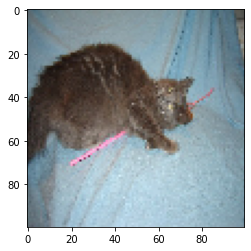

[[0. 1.]]


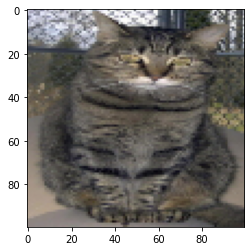

[[0. 1.]]


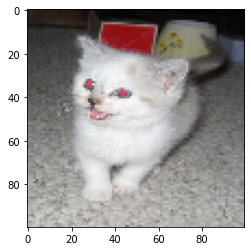

[[1. 0.]]


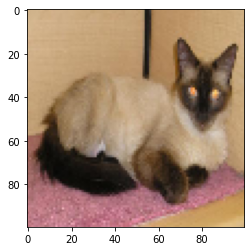

[[1. 0.]]


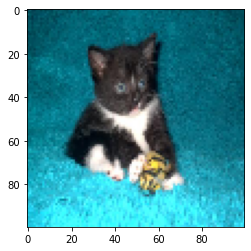

[[0. 1.]]


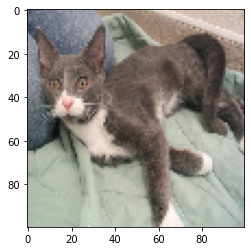

[[0. 1.]]


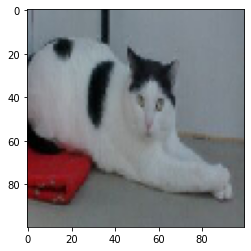

[[1. 0.]]


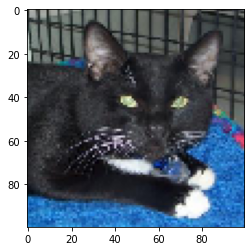

[[1. 0.]]


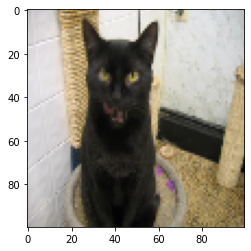

[[1.000000e+00 4.357872e-32]]


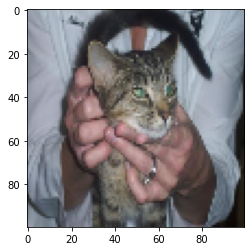

[[0. 1.]]


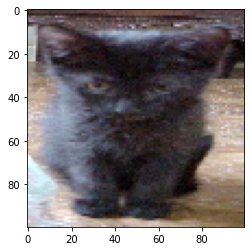

[[1. 0.]]


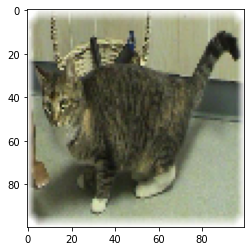

[[4.5492296e-14 1.0000000e+00]]


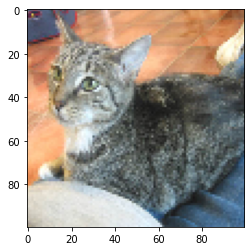

[[1. 0.]]


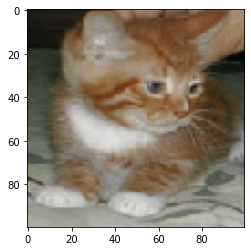

[[1.0401973e-36 1.0000000e+00]]


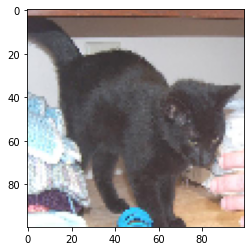

[[6.127338e-13 1.000000e+00]]


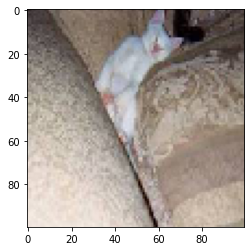

[[0. 1.]]


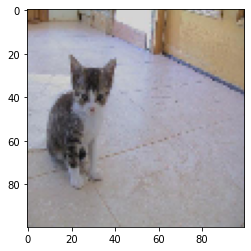

[[1. 0.]]


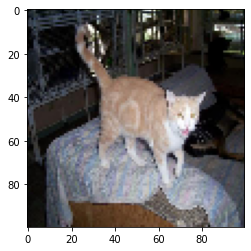

[[0. 1.]]


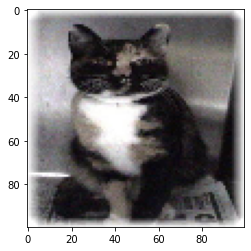

[[1. 0.]]


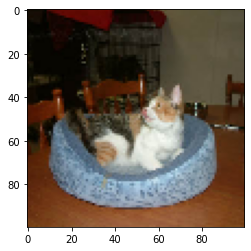

[[1. 0.]]


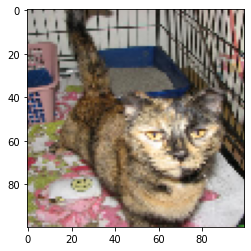

[[0. 1.]]


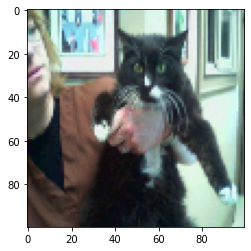

[[0. 1.]]


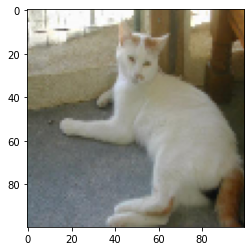

[[1. 0.]]


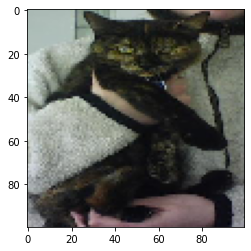

[[1. 0.]]


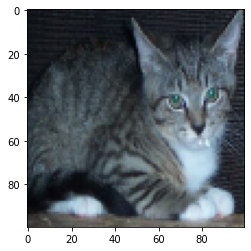

[[1. 0.]]


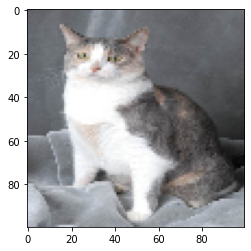

[[1. 0.]]


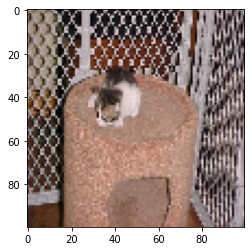

[[1. 0.]]


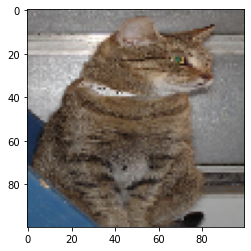

[[0. 1.]]


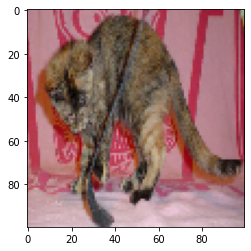

[[0. 1.]]


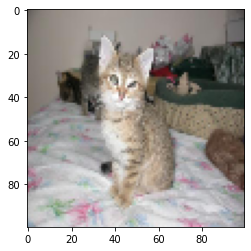

[[1. 0.]]


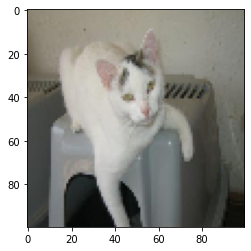

[[0. 1.]]


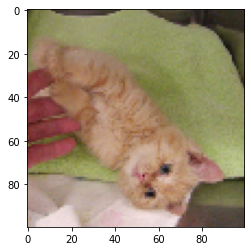

[[1.000000e+00 1.087209e-31]]


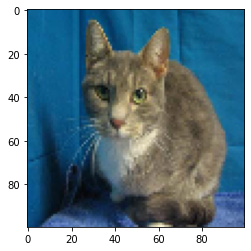

[[1. 0.]]


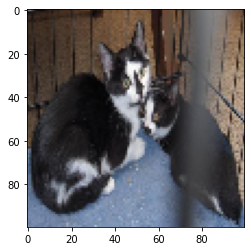

[[9.9999774e-01 2.3098344e-06]]


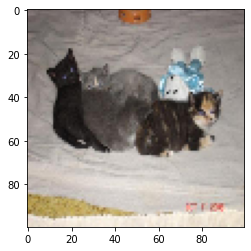

[[1. 0.]]


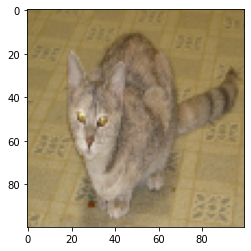

[[1. 0.]]


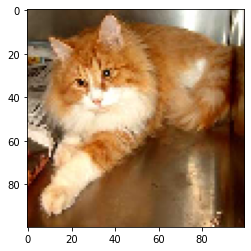

[[0. 1.]]


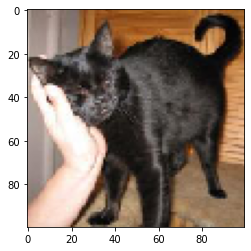

[[1. 0.]]


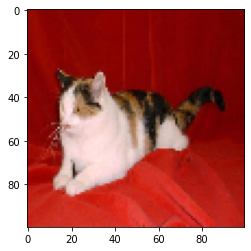

[[1. 0.]]


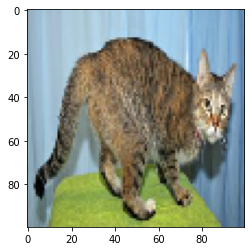

[[0. 1.]]


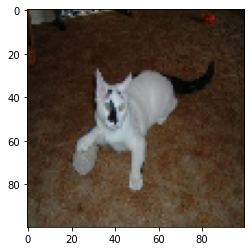

[[0. 1.]]


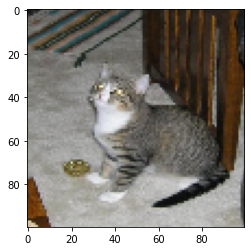

[[1. 0.]]


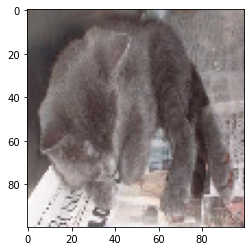

[[1.4906634e-34 1.0000000e+00]]


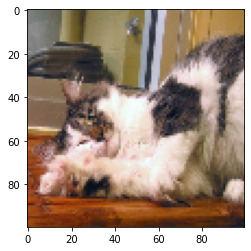

[[1. 0.]]


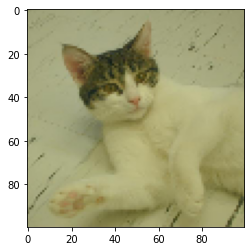

[[1. 0.]]


In [13]:
dir_path=r'C:\Users\nitis\Desktop\cat vs dog\test'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    print(val)

In [14]:

acc_test_auto = model.evaluate(X_test, y_test)



63/63 [==============================] - 12s 184ms/step - loss: 0.5542 - accuracy: 0.7797


In [15]:
#pickle.dump(X,open('X1.pkl','wb'))
#pickle.dump(y,open('y1.pkl','wb'))